**Ph 22 Assignment 2 (set 3)**

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#copy pasting from assignment 1 (set 2)
def rungekutta(xilist, t, h, fx):
    
    vec = np.array(xilist)
    
    k1 = np.array(h * fx(vec,t))
    vec1 = vec + (k1 / 2)
    
    k2 = np.array(h * fx(vec1, t + h/2))
    vec2 = vec + (k2 / 2)
    
    k3 = np.array(h * fx(vec2, t + h/2))
    vec3 = vec + k3
    
    k4 = np.array(h * fx(vec3, t + h))
    
    
    newvec = vec + (1/6)*(k1 + 2*k2 + 2*k3 + k4)
    
    return(newvec)

def rkstepper(xilist, tarray, h, fx):
    
    xicurrent = []
    xicurrent.append(xilist)
    
    for i, time in enumerate(tarray):
        
        xinew = rungekutta(xicurrent[i], time, h, fx)
        xicurrent.append(xinew)
    
    return(xicurrent)

In [27]:
R = 778.3*10**9 #meters
G = 6.6742*10**(-11) #m**3 /(kg s**2)
TJ = 3.743*10**8 #s
M1 = 1.899*10**27 #kg
M2 = 1.989*10**30 #kg

grav = R / (M1 + M2)
om = np.sqrt(G*(M1+M2)/(R**3))
OM = np.array([0,0,om])

def aststep(xilist, t):
    x, y, vx, vy = xilist
    r = np.array([x,y,0])
    v = np.array([vx,vy,0])
    
    r1 = np.array([M2*grav, 0, 0])
    r2 = np.array([-M1*grav, 0, 0])
    
    #asteroid mass cancels
    gforce1 = -G*M1*(r-r1)/(np.linalg.norm(r-r1)**3)
    gforce2 = -G*M2*(r-r2)/(np.linalg.norm(r-r2)**3)
    coriolis = 2 * om * np.array([vy, -vx, 0])
    centrifugal = (om**2) * r
    
    Aarray = gforce1 + gforce2 + coriolis + centrifugal
    
    
    ax = Aarray[0]
    ay = Aarray[1]
    
    array = np.array([vx, vy, ax, ay])
    
    return(array)

In [49]:
JSperiod = 2*np.pi/om

t1ast = np.linspace(0, JSperiod*10, 10000)

massdif = (M2-M1)/(M1+M2)
x0ast1 = R*massdif*np.cos(np.pi/3+0.0001)
y0ast1 = R*np.sin(np.pi/3 + 0.0001)

x0ast2 = R*massdif*np.cos(np.pi/3+0.003)
y0ast2 = R*np.sin(np.pi/3 + 0.003)

x0ast3 = R*massdif*np.cos(np.pi/3+0.01)
y0ast3 = R*np.sin(np.pi/3 + 0.01)


#rkstepper([x0ast,y0ast,0,0], t1ast, JSperiod*3/10000, aststep)
asteroidorbit1 = np.transpose(rkstepper([x0ast1,y0ast1,0,0], t1ast, JSperiod*3/10, aststep))
asteroidorbit2 = np.transpose(rkstepper([x0ast2,y0ast2,0,0], t1ast, JSperiod*3/10, aststep))
asteroidorbit3 = np.transpose(rkstepper([x0ast3,y0ast3,0,0], t1ast, JSperiod*3/10, aststep))

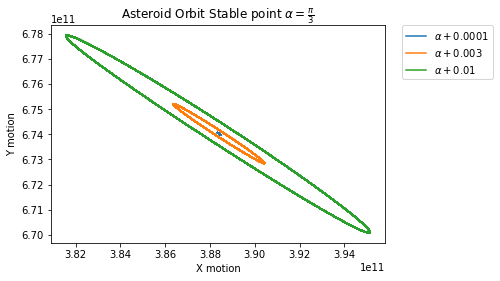

In [60]:
plt.figure()

plt.plot(asteroidorbit1[0],asteroidorbit1[1],label=r'$\alpha + 0.0001$')
plt.plot(asteroidorbit2[0],asteroidorbit2[1],label=r'$\alpha + 0.003$')
plt.plot(asteroidorbit3[0],asteroidorbit3[1],label=r'$\alpha + 0.01$')

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.xlabel('X motion')
plt.ylabel('Y motion')

plt.title(r'Asteroid Orbit Stable point $\alpha = \frac{\pi}{3}$')

plt.show()

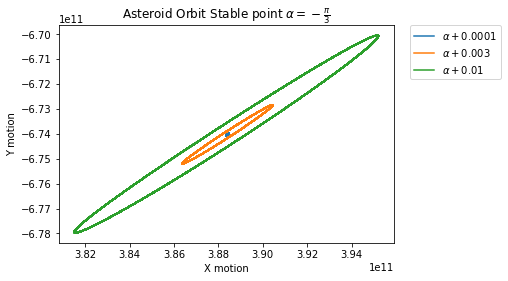

In [61]:
x1ast1 = R*massdif*np.cos(-np.pi/3+0.0001)
y1ast1 = R*np.sin(-np.pi/3 + 0.0001)

x1ast2 = R*massdif*np.cos(-np.pi/3+0.003)
y1ast2 = R*np.sin(-np.pi/3 + 0.003)

x1ast3 = R*massdif*np.cos(-np.pi/3+0.01)
y1ast3 = R*np.sin(-np.pi/3 + 0.01)


astorbit1 = np.transpose(rkstepper([x1ast1,y1ast1,0,0], t1ast, JSperiod*3/10, aststep))
astorbit2 = np.transpose(rkstepper([x1ast2,y1ast2,0,0], t1ast, JSperiod*3/10, aststep))
astorbit3 = np.transpose(rkstepper([x1ast3,y1ast3,0,0], t1ast, JSperiod*3/10, aststep))

plt.figure()

plt.plot(astorbit1[0],astorbit1[1],label=r'$\alpha + 0.0001$')
plt.plot(astorbit2[0],astorbit2[1],label=r'$\alpha + 0.003$')
plt.plot(astorbit3[0],astorbit3[1],label=r'$\alpha + 0.01$')

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.xlabel('X motion')
plt.ylabel('Y motion')

plt.title(r'Asteroid Orbit Stable point $\alpha = -\frac{\pi}{3}$')

plt.show()

In [77]:
x2ast1 = R*massdif*np.cos(-np.pi/3+0.0001)
y2ast1 = R*np.sin(-np.pi/3 - 0.0001)

x2ast2 = R*massdif*np.cos(-np.pi/3+0.003)
y2ast2 = R*np.sin(-np.pi/3 - 0.003)

x2ast3 = R*massdif*np.cos(-np.pi/3 + 0.01)
y2ast3 = R*np.sin(-np.pi/3 - 0.01)

x2ast4 = R*massdif*np.cos(-np.pi/3+0.0105)
y2ast4 = R*np.sin(-np.pi/3 - 0.0105)

astorbit4 = np.transpose(rkstepper([x2ast1,y2ast1,0,0], t1ast, JSperiod*3/10, aststep))
astorbit5 = np.transpose(rkstepper([x2ast2,y2ast2,0,0], t1ast, JSperiod*3/10, aststep))
astorbit6 = np.transpose(rkstepper([x2ast3,y2ast3,0,0], t1ast, JSperiod*3/10, aststep))
astorbit7 = np.transpose(rkstepper([x2ast4,y2ast4,0,0], t1ast, JSperiod*3/10, aststep))

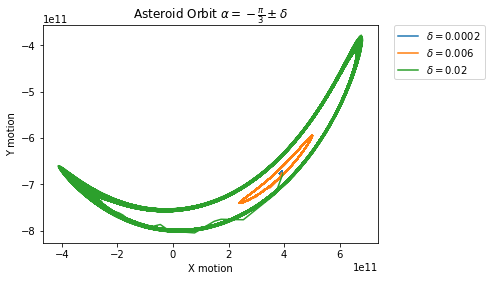

Text(0.5,1,'Asteroid Orbit $\\alpha = -\\frac{\\pi}{3} \\pm \\delta$')

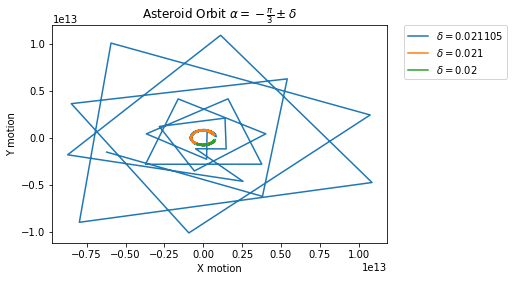

In [83]:
x2ast5 = R*massdif*np.cos(-np.pi/3+0.0105525)
y2ast5 = R*np.sin(-np.pi/3 - 0.0105525)

astorbit8 = np.transpose(rkstepper([x2ast5,y2ast5,0,0], t1ast, JSperiod*3/10, aststep))


plt.figure()

plt.plot(astorbit4[0],astorbit4[1],label=r'$\delta = 0.0002$')
plt.plot(astorbit5[0],astorbit5[1],label=r'$\delta = 0.006$')
plt.plot(astorbit6[0],astorbit6[1],label=r'$\delta = 0.02$')


plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.xlabel('X motion')
plt.ylabel('Y motion')

plt.title(r'Asteroid Orbit $\alpha = -\frac{\pi}{3} \pm \delta$')

plt.show()

plt.figure()

plt.plot(astorbit8[0],astorbit8[1],label=r'$\delta = 0.021105$')
plt.plot(astorbit7[0],astorbit7[1],label=r'$\delta = 0.021$')
plt.plot(astorbit6[0],astorbit6[1],label=r'$\delta = 0.02$')

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.xlabel('X motion')
plt.ylabel('Y motion')

plt.title(r'Asteroid Orbit $\alpha = -\frac{\pi}{3} \pm \delta$')

The straight-line appearance of the largest delta plot should actually just be due to the step size being too large given the magnitude of the velocity once the asteroid alpha values don't match enough.

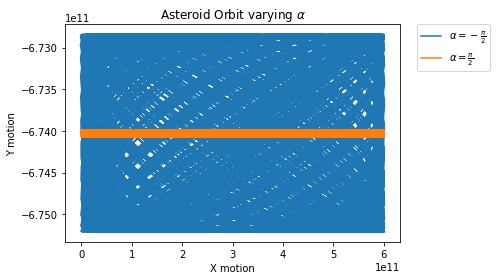

In [87]:
xrast1 = R*massdif*np.cos(-np.pi/2)
yrast1 = R*np.sin(-np.pi/2)

xrast2 = R*massdif*np.cos(np.pi/2)
yrast2 = R*np.sin(np.pi/2)

#xrast3 = R*massdif*np.cos(0)
#yrast3 = R*np.sin(0)


astRorbit1 = np.transpose(rkstepper([xrast1,yrast1,0,0], t1ast, JSperiod*3/10, aststep))
astRorbit2 = np.transpose(rkstepper([xrast2,yrast2,0,0], t1ast, JSperiod*3/10, aststep))
#astRorbit3 = np.transpose(rkstepper([xrast3,yrast3,0,0], t1ast, JSperiod*3/10, aststep))

plt.figure()

plt.plot(astRorbit2[0],astorbit2[1],label=r'$\alpha = -\frac{\pi}{2}$')
plt.plot(astRorbit1[0],astorbit1[1],label=r'$\alpha = \frac{\pi}{2}$')
#plt.plot(astRorbit3[0],astorbit3[1],label=r'$\alpha = 0$')

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.xlabel('X motion')
plt.ylabel('Y motion')

plt.title(r'Asteroid Orbit varying $\alpha$')

plt.show()

I just wanted to plot this to show the stationary points were exceptional, which of course should be obvious, but it's fun to see it in plot form.


For this next bit, I'm just going to plot with M = M_jupiter, which for us is M1.

In [114]:
def compmasses(xilist, t):
    x1, y1, vx1, vy1 = xilist[0:4]
    x2, y2, vx2, vy2 = xilist[4:8]
    x3, y3, vx3, vy3 = xilist[8:12]
    
    r1 = np.array([x1,y1,0])
    r2 = np.array([x2,y2,0])
    r3 = np.array([x3,y3,0])
    
    dif12 = r1-r2
    dif23 = r2-r3
    dif31 = r3-r1
    
    onetwo = -G*M1*dif12 / (np.linalg.norm(dif12)**3)
    twothree = -G*M1*dif23 / (np.linalg.norm(dif23)**3)
    threeone = -G*M1*dif31 / (np.linalg.norm(dif31)**3)
    
    a1 = onetwo - threeone
    a2 = -onetwo + twothree
    a3 = threeone - twothree
    
    ax1, ay1, trash1 = a1
    ax2, ay2, trash2 = a2
    ax3, ay3, trash3 = a3
    
    lst = [vx1, vy1, ax1, ay1, vx2, vy2, ax2, ay2, vx3, vy3, ax3, ay3]
    
    array = np.array(lst)
    
    return(array)

Proving that $v_{rotation} = \sqrt{\frac{G \ M}{d}}$ :

The net force on each particle should be:
$\frac{G M^2}{r^2}$ in the direction of the second particle and
$\frac{G M^2}{r^2}$ in the direction of the third particle

The opposing parts of these forces should cancel, as their masses and radii are the same (d), leaving us with just the components pulling the particle towards the center of the triangle.

Trigonometry tells us that component of the force due to one particle is $\frac{\sqrt{3}}{2}$ of the total force magnitude, $\frac{G M^2}{d^2}$. Therefore, the total magnitude is $\sqrt{3}$ times the force from one particle, or $$\frac{G M^2 \sqrt{3}}{d^2}$$

This inwards force is balanced by the outwards centripital force. This force is in the form $\frac{m v^2}{r}$. For this setup, trigonometry and substitution tell us this force becomes $$\frac{M v^2}{\frac{d}{\sqrt{3}}}$$

Setting these two forces equal, we see:

$$\frac{M v^2 \sqrt{3}}{d} = \frac{G M^2 \sqrt{3}}{d^2}$$

Cancelling like terms:

$$v^2 = \frac{G M}{d}$$

Which clearly leads to our solution:

$$v = \sqrt{\frac{G M}{d}}$$


Initial conditions of an equilateral triangle should be $$(0,0) \ (\frac{d}{2}, \frac{d \sqrt{3}}{2}) \ and \ (d,0)$$
Their velocities should be
$$ (-\frac{v}{2},\frac{v \sqrt{3}}{2}) \ (-\frac{v}{2}, \frac{-v \sqrt{3}}{2}) \ and \ (v,0) $$

Using d = R (semimajor axis of jupiter's orbit) and using $v = \sqrt{G M / d} = \sqrt{\frac{G M_1} { R}}$, we have the initial value array of

In [115]:
v0 = np.sqrt(G*M1/R)

initb1 = [0,0,-v0/2, v0*np.sqrt(3)/2]
initb2 = [R/2, R*np.sqrt(3)/2,v0,0]
initb3 = [R,0,-v0/2,-v0*np.sqrt(3)/2]

threeb01 = []
threeb01.extend(initb1)
threeb01.extend(initb2)
threeb01.extend(initb3)

In [122]:
t1ast = np.linspace(0, JSperiod*10, 10000)

threebtest = np.transpose(rkstepper(threeb01, t1ast, JSperiod*3/1000, compmasses))

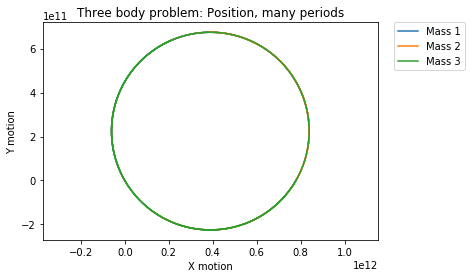

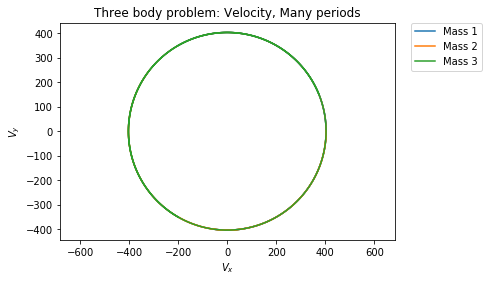

In [128]:
plt.figure()

plt.plot(threebtest[0],threebtest[1], label='Mass 1')
plt.plot(threebtest[4],threebtest[5], label='Mass 2')
plt.plot(threebtest[8],threebtest[9], label='Mass 3')

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel('X motion')
plt.ylabel('Y motion')
plt.title('Three body problem: Position, many periods')

plt.axis('equal')
plt.show()



plt.figure()

plt.plot(threebtest[2],threebtest[3], label='Mass 1')
plt.plot(threebtest[6],threebtest[7], label='Mass 2')
plt.plot(threebtest[10],threebtest[11], label='Mass 3')

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel(r'$V_x$')
plt.ylabel(r'$V_y$')
plt.title('Three body problem: Velocity, Many periods')


plt.axis('equal')
plt.show()

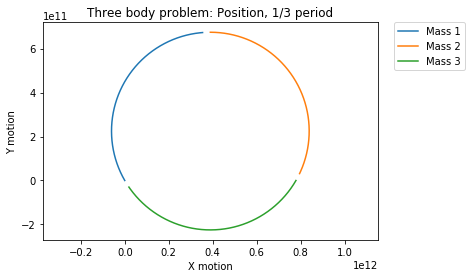

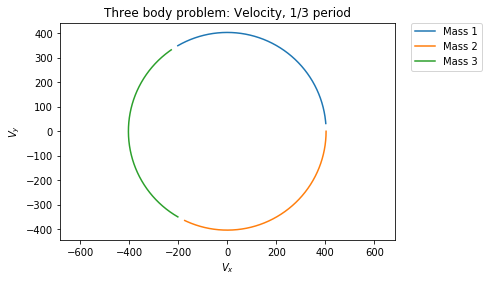

In [129]:
plt.figure()

plt.plot(threebtest[0][:2000],threebtest[1][:2000], label='Mass 1')
plt.plot(threebtest[4][:2000],threebtest[5][:2000], label='Mass 2')
plt.plot(threebtest[8][:2000],threebtest[9][:2000], label='Mass 3')

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel('X motion')
plt.ylabel('Y motion')
plt.title('Three body problem: Position, 1/3 period')

plt.axis('equal')
plt.show()



plt.figure()

plt.plot(threebtest[2][:2000],threebtest[3][:2000], label='Mass 1')
plt.plot(threebtest[6][:2000],threebtest[7][:2000], label='Mass 2')
plt.plot(threebtest[10][:2000],threebtest[11][:2000], label='Mass 3')

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel(r'$V_x$')
plt.ylabel(r'$V_y$')
plt.title('Three body problem: Velocity, 1/3 period')


plt.axis('equal')
plt.show()

In [137]:
def choreostep(xilist, t):
    x1, y1, vx1, vy1 = xilist[0:4]
    x2, y2, vx2, vy2 = xilist[4:8]
    x3, y3, vx3, vy3 = xilist[8:12]
    
    r1 = np.array([x1,y1,0])
    r2 = np.array([x2,y2,0])
    r3 = np.array([x3,y3,0])
    
    dif12 = r1-r2
    dif23 = r2-r3
    dif31 = r3-r1
    
    onetwo = -dif12 / (np.linalg.norm(dif12)**3)
    twothree = -dif23 / (np.linalg.norm(dif23)**3)
    threeone = -dif31 / (np.linalg.norm(dif31)**3)
    
    a1 = onetwo - threeone
    a2 = -onetwo + twothree
    a3 = threeone - twothree
    
    ax1, ay1, trash1 = a1
    ax2, ay2, trash2 = a2
    ax3, ay3, trash3 = a3
    
    lst = [vx1, vy1, ax1, ay1, vx2, vy2, ax2, ay2, vx3, vy3, ax3, ay3]
    
    array = np.array(lst)
    
    return(array)

In [138]:
vx3c, vy3c = -0.93240737, -0.86473146
x1c, y1c = 0.97000436, -0.24308753

initc3 = [0,0, vx3c, vy3c]
initc1 = [x1c, y1c, -vx3c/2, -vy3c/2]
initc2 = [-x1c, -y1c, -vx3c/2, -vy3c/2]

threec = []
threec.extend(initc1)
threec.extend(initc2)
threec.extend(initc3)

In [139]:
tchoreo = np.linspace(0, 1, 1000)

choreotest = np.transpose(rkstepper(threec, tchoreo, 0.01, choreostep))

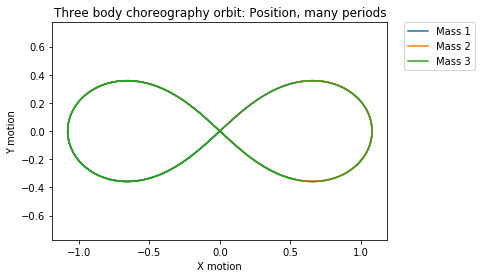

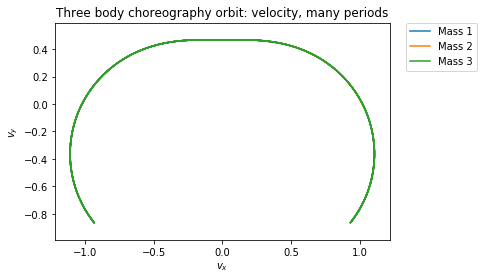

In [143]:
plt.figure()

plt.plot(choreotest[0],choreotest[1], label='Mass 1')
plt.plot(choreotest[4],choreotest[5], label='Mass 2')
plt.plot(choreotest[8],choreotest[9], label='Mass 3')

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel('X motion')
plt.ylabel('Y motion')
plt.title('Three body choreography orbit: Position, many periods')

plt.axis('equal')
plt.show()


plt.figure()

plt.plot(choreotest[2],choreotest[3], label='Mass 1')
plt.plot(choreotest[6],choreotest[7], label='Mass 2')
plt.plot(choreotest[10],choreotest[11], label='Mass 3')

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel('$v_x$')
plt.ylabel('$v_y$')
plt.title('Three body choreography orbit: velocity, many periods')

plt.axis('equal')
plt.show()

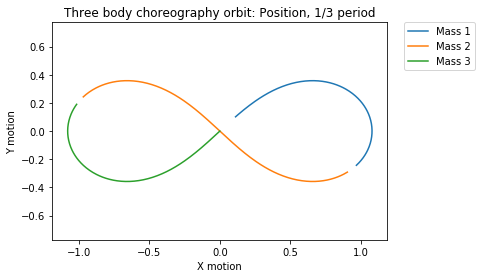

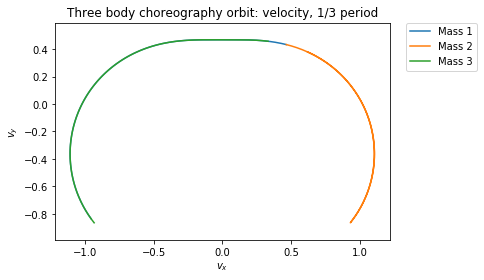

In [144]:
plt.figure()

plt.plot(choreotest[0][:200],choreotest[1][:200], label='Mass 1')
plt.plot(choreotest[4][:200],choreotest[5][:200], label='Mass 2')
plt.plot(choreotest[8][:200],choreotest[9][:200], label='Mass 3')

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel('X motion')
plt.ylabel('Y motion')
plt.title('Three body choreography orbit: Position, 1/3 period')

plt.axis('equal')
plt.show()


plt.figure()

plt.plot(choreotest[2][:200],choreotest[3][:200], label='Mass 1')
plt.plot(choreotest[6][:200],choreotest[7][:200], label='Mass 2')
plt.plot(choreotest[10][:200],choreotest[11][:200], label='Mass 3')

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel('$v_x$')
plt.ylabel('$v_y$')
plt.title('Three body choreography orbit: velocity, 1/3 period')

plt.axis('equal')
plt.show()